# New York Times - News Classification

## 1 Introduction 

In this document we will check the performance of the classifier Naive Bayes and Support Vector Machine (SVM) to categorize news according to their title into twenty-eight standard topics. In this problem we will deal with every New York Times front page story from 1996 to 2006, coded according to the Policy Agendas (http://www.policyagendas.org). This collection of data has been compiled by Amber E. Boydstun.

<center><img src="files/The_New_York_Times_logo.png"></center>

Specifically, we are interested in classifying news from The New York Times in the following macro-topics according to its title:

<table border="1">
<tr>
<td>
1 
<td>
Macroeconomics
<tr>
<td>
2 
<td>
Civil Rights, Minority Issues, and Civil Liberties 
<tr>
<td>
3
<td>
Health
<tr>
<td>
4 
<td>Agriculture
<tr>
<td>
5 
<td>Labor, Employment, and Immigration
<tr>
<td>
6 
<td> Education
<tr>
<td>
7
<td>Environment
<tr>
<td>
8
<td>Energy
<tr>
<td>
10 
<td>Transportation
<tr>
<td>
12 
<td>Law, Crime, and Family Issues
<tr>
<td>
13 
<td>Social Welfare
<tr>
<td>
14 
<td>Community Development and Housing Issues
<tr>
<td>
15 
<td>Banking, Finance, and Domestic Commerce
<tr>
<td>
16 
<td>Defense
<tr>
<td>
17 
<td>Space, Science, Technology and Communications
<tr>
<td>
18 
<td>Foreign Trade
<tr>
<td>
19 
<td>International Affairs and Foreign Aid
<tr>
<td>
20 
<td>Government Operations
<tr>
<td>
21 
<td>Public Lands and Water Management
<tr>
<td>
24 
<td>State and Local Government Administration
<tr>
<td>
26 
<td>Weather and Natural Disasters
<tr>
<td>
27 
<td>Fires
<tr>
<td>
28 
<td>Arts and Entertainment
<tr>
<td>
29 
<td>Sports and Recreation
<tr>
<td>
30 
<td>Death Notices
<tr>
<td>
31 
<td>Churches and Religion
<tr>
<td>
99 
<td>Other, Miscellaneous, and Human Interest

In this analysis, we will use Generative models (Naive Bayes) and Discriminative models (Support Vector Machines). Furthermore, we will perfom our analysis using the Scikit-learn library in Python. 

## 2 Import the necessary libraries 

In [1]:
import pandas as pd  #data management and data analysis
import seaborn as sn # data visualization
import matplotlib.pyplot as plt # data visualization
import sklearn #machine learning library

from sklearn import svm # support vector machine
from sklearn.svm import SVC #support vector classifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report #sklearn metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#open a new window and display the graphics in that way
%matplotlib inline 

## 3 Explore the data 

In this document we will classify news from The New York Times Newspapper, using the dataset called: Boydstun_NYT_FrontPage_Dataset_1996-2006_0.csv

In the Files folder there are more details about this dataset.

In [2]:
#Load the data
dataNYT=pd.read_csv('Boydstun_NYT_FrontPage_Dataset_1996-2006_0.csv')
dataNYT.head()

,Article_ID,Date,Article_Sequence,Title,Summary,Topic_6digit,Topic_4digit,Topic_2digit,War on Terror,Katrina,Israel/Palestine,Immigration,Presidential Elections,Clinton Impeachment,Enron,Darfur,Race/Ethnicity,Schiavo
0,1,1/1/1996,a,Nation's Smaller Jails Struggle To Cope With S...,Jails overwhelmed with hardened criminals,120500,1205,12,0,0,0,0,0,0,0,0,0,0
1,2,1/1/1996,b,Dancing (and Kissing) In the New Year,new years activities,280000,2800,28,0,0,0,0,0,0,0,0,0,0
2,3,1/1/1996,c,Forbes's Silver Bullet for the Nation's Malaise,Steve Forbes running for President,201201,2012,20,0,0,0,0,1,0,0,0,0,0
3,4,1/1/1996,d,"Up at Last, Bridge to Bosnia Is Swaying Gatewa...",U.S. military constructs bridge to help their ...,160200,1602,16,0,0,0,0,0,0,0,0,0,0
4,5,1/1/1996,e,2 SIDES IN SENATE DISAGREE ON PLAN TO END FURL...,Democrats and Republicans can't agree on plan ...,201206,2012,20,0,0,0,0,0,0,0,0,0,0


Check the type of information that is part of the data frame:

In [3]:
dataNYT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31034 entries, 0 to 31033
Data columns (total 18 columns):
Article_ID                31034 non-null int64
Date                      31034 non-null object
Article_Sequence          31034 non-null object
Title                     31034 non-null object
Summary                   31034 non-null object
Topic_6digit              31034 non-null int64
Topic_4digit              31034 non-null int64
Topic_2digit              31034 non-null int64
War on Terror             31034 non-null int64
Katrina                   31034 non-null int64
Israel/Palestine          31034 non-null int64
Immigration               31034 non-null int64
Presidential Elections    31034 non-null int64
Clinton Impeachment       31034 non-null int64
Enron                     31034 non-null int64
Darfur                    31034 non-null int64
Race/Ethnicity            31034 non-null int64
Schiavo                   31034 non-null int64
dtypes: int64(14), object(4)
memory usage

Check if there are null values in the data frame:

In [4]:
dataNYT.isnull().sum()

Article_ID                0
Date                      0
Article_Sequence          0
Title                     0
Summary                   0
Topic_6digit              0
Topic_4digit              0
Topic_2digit              0
War on Terror             0
Katrina                   0
Israel/Palestine          0
Immigration               0
Presidential Elections    0
Clinton Impeachment       0
Enron                     0
Darfur                    0
Race/Ethnicity            0
Schiavo                   0
dtype: int64

Comments: It looks like there is not any null value in the data frame.

## 4 Data Processing 

### 4.1 Response and Feature Variables 

Firstly, separate the dataset into response variables (data to analyze) and feature variables (the target to achieve).

In [5]:
import numpy as np

X = dataNYT['Title']
y = dataNYT['Topic_2digit']

# X variable = store the data
# y variable = store the classes/targets

In [6]:
#let's check an example of the data split
X[0],y[0]

("Nation's Smaller Jails Struggle To Cope With Surge in Inmates ", 12)

### 4.2 Training and Test Split

Let us split the data set in two set:

* We will train the classifier with news up to 2004 (1/1/2004).
* We will test the performance of the classifier in news from 2004 and 2006.

In [7]:
import numpy as np

split = pd.to_datetime(pd.Series(dataNYT['Date']))<pd.datetime(2004, 1, 1) #data to train

#train and test split for X variable (data to analyze)
X_train = X[split]
X_test = X[np.logical_not(split)]

#train and test split for y variable (target)
y_train = y[split]
y_test = y[np.logical_not(split)]

print ('Check the split sizes, train, test and total amount of data:')
print (X_train.shape, X_test.shape, X.shape)
print ('Display the labels:')
print (np.unique(y)) #remove duplicated values

Check the split sizes, train, test and total amount of data:
(23584,) (7450,) (31034,)
Display the labels:
[ 1  2  3  4  5  6  7  8 10 12 13 14 15 16 17 18 19 20 21 24 26 27 28 29
 30 31 99]


### 4.3 Data Tokenization

Text data requires special preparation before you can start using it for predictive modeling. The text must be analyzed to eliminate words. Then, the words must be coded as integers or floating point values for use as input to a machine learning algorithm, called vectorization.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer #convert text to word count vectors

# We use the count number of instances considering that a word has a minimum support of two documents
vectorizer = CountVectorizer(min_df=2, 

# stop words such as 'and', 'the', 'of' are removed                             
stop_words='english', 
strip_accents='unicode')

#Fit and convert data
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print ("Number of tokens: " + str(len(vectorizer.get_feature_names())) +"\n")
print ("Extract of tokens:")
print (vectorizer.get_feature_names()[1000:1100])

Number of tokens: 8950

Extract of tokens:
['boeing', 'boiling', 'boils', 'bold', 'bolster', 'bolsters', 'bolt', 'bolts', 'bomb', 'bombay', 'bombed', 'bomber', 'bombers', 'bombing', 'bombings', 'bombs', 'bonanza', 'bond', 'bondage', 'bonds', 'bone', 'bones', 'bonn', 'bono', 'bonus', 'bonuses', 'book', 'books', 'booksellers', 'bookstore', 'boom', 'boomers', 'booming', 'booms', 'boost', 'boot', 'bora', 'border', 'borders', 'born', 'borough', 'boroughs', 'borrow', 'borrowing', 'bosnia', 'bosnian', 'bosnians', 'boss', 'bosses', 'boston', 'botched', 'bottle', 'bought', 'bounce', 'bound', 'bounty', 'bout', 'bow', 'bowing', 'bowl', 'bows', 'box', 'boxes', 'boxing', 'boy', 'boycott', 'boys', 'brace', 'braced', 'braces', 'bracket', 'bradley', 'brain', 'brains', 'branches', 'brand', 'brash', 'brave', 'bravery', 'braves', 'brawl', 'brawley', 'brazil', 'brazilian', 'breach', 'breaches', 'bread', 'break', 'breakdown', 'breaking', 'breaks', 'breakthrough', 'breakup', 'breast', 'breather', 'breed', '

## 5 Prediction and Evaluation 

### 5.1 The Naive Bayes Classifier  

Let's review the performance of our model using one of the most common class of the Naive Bayes Classifier => BernoulliNB

classification accuracy: 0.4348993288590604
Classification Report:
              precision    recall  f1-score   support

           1       0.32      0.64      0.43        56
           2       0.01      0.67      0.01         3
           3       0.51      0.65      0.57       343
           4       0.00      0.00      0.00         0
           5       0.01      1.00      0.01         1
           6       0.13      0.96      0.23        27
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          12       0.46      0.43      0.44       466
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.09      0.54      0.16        57
          16       0.54      0.57      0.55      1259
          17       0.03      1.00      0.06         4
          18       0.00      0.00      0.00         0
          19  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


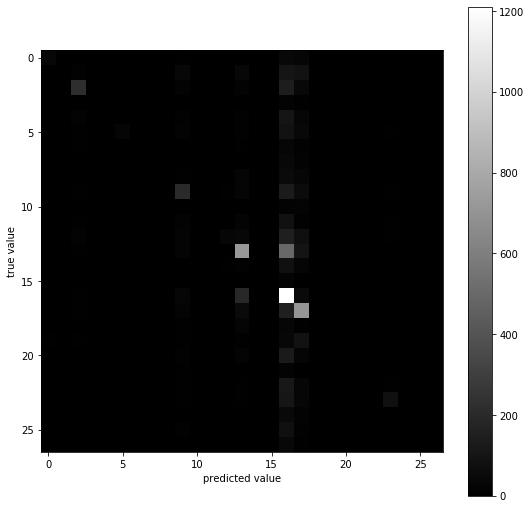

In [9]:
%matplotlib inline

#Fit a Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()  #set up the class
nb.fit(X_train,y_train) #perform the fit

pred_nb = nb.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest',cmap='gray')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print ("classification accuracy:", metrics.accuracy_score(pred_nb, y_test))
plot_confusion_matrix(pred_nb, y_test)
print ("Classification Report:")
print (metrics.classification_report(pred_nb,np.array(y_test)))

In [10]:
#Save data for future use
import pickle
ofname = open('NYT_data.pkl', 'wb')
s = pickle.dump([X_train,y_train,X_test,y_test],ofname)
ofname.close()

In [11]:
#What are the top N most predictive features per class?
N = 5
voc = vectorizer.get_feature_names()
for i, label in enumerate(np.unique(y)):
    topN = np.argsort(nb.coef_[i])[-N:]
    print ('Code: '+ str(label) + ' Terms : '+ str([voc[i] for i in topN]))

Code: 1 Terms : ['cut', 'bush', 'economy', 'budget', 'tax']
Code: 2 Terms : ['race', 'gay', 'new', 'court', 'abortion']
Code: 3 Terms : ['care', 'medicare', 'drug', 'health', 'new']
Code: 4 Terms : ['farm', 'safety', 'new', 'farmers', 'food']
Code: 5 Terms : ['workers', 'strike', 'union', 'immigrants', 'new']
Code: 6 Terms : ['students', 'city', 'new', 'school', 'schools']
Code: 7 Terms : ['rules', 'warming', 'air', 'new', 'pollution']
Code: 8 Terms : ['blackout', 'california', 'power', 'energy', 'oil']
Code: 10 Terms : ['new', 'security', '800', 'flight', 'crash']
Code: 12 Terms : ['drug', 'case', 'death', 'new', 'police']
Code: 13 Terms : ['plan', 'security', 'new', 'social', 'welfare']
Code: 14 Terms : ['city', 'homeless', 'york', 'rent', 'new']
Code: 15 Terms : ['new', 'billion', 'deal', 'enron', 'microsoft']
Code: 16 Terms : ['bush', 'challenged', 'war', 'iraq', 'nation']
Code: 17 Terms : ['space', 'nasa', 'loss', 'new', 'shuttle']
Code: 18 Terms : ['business', 'bush', 'clinton', 

Comments: The prediction result is not very high, so we can add more features to get a better prediction result.

Let us check what would happen if we enrich the data set with the summary of the article.

In [12]:
#Add more features to the model to get a better prediction result
X = dataNYT['Title']+dataNYT['Summary']
X_train = X[split]
X_test = X[np.logical_not(split)]
y = dataNYT['Topic_2digit']
y_train = y[split]
y_test = y[np.logical_not(split)]

In [13]:
# Let us tokenize the data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=2, 

# stop words such as 'and', 'the', 'of' are removed                                  
stop_words='english', 
strip_accents='unicode')

#Fit and convert data
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print ("\n")
print ("Number of tokens: " + str(len(vectorizer.get_feature_names())) +"\n")
print ("Extract of tokes:")
print( vectorizer.get_feature_names()[1000:1100])



Number of tokens: 11354

Extract of tokes:
['banned', 'banner', 'banning', 'bans', 'bansenate', 'banus', 'baptist', 'baptists', 'bar', 'barak', 'barbie', 'bare', 'barely', 'bares', 'bargain', 'bargaining', 'bargains', 'barnes', 'barney', 'baron', 'barons', 'barrage', 'barred', 'barrel', 'barren', 'barrier', 'barriers', 'barring', 'bars', 'barter', 'base', 'baseball', 'based', 'basement', 'bases', 'basespentagon', 'bashing', 'basic', 'basis', 'baskeball', 'basketball', 'basks', 'basra', 'bastion', 'bat', 'bath', 'batter', 'battered', 'battering', 'batters', 'battery', 'battle', 'battledemocrats', 'battlefield', 'battleground', 'battles', 'battleus', 'battling', 'bay', 'bayer', 'bbc', 'beach', 'beaches', 'bear', 'bearing', 'bears', 'beat', 'beaten', 'beating', 'beats', 'beautiful', 'beauty', 'beckons', 'bed', 'bedevil', 'bedeviled', 'beef', 'beetle', 'began', 'begin', 'beginning', 'begins', 'beginsphoto', 'begun', 'behavior', 'behemoth', 'beijing', 'beijingus', 'beirut', 'belarus', 'be

classification accuracy: 0.5155704697986577
Classification Report:
              precision    recall  f1-score   support

           1       0.45      0.61      0.52        83
           2       0.06      0.94      0.11        18
           3       0.69      0.59      0.63       514
           4       0.00      0.00      0.00         0
           5       0.03      0.67      0.06         9
           6       0.46      0.87      0.61       106
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
          10       0.01      0.50      0.02         2
          12       0.61      0.41      0.49       651
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.23      0.55      0.32       136
          16       0.70      0.64      0.67      1466
          17       0.06      1.00      0.11         8
          18       0.00      0.00      0.00         0
          19  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


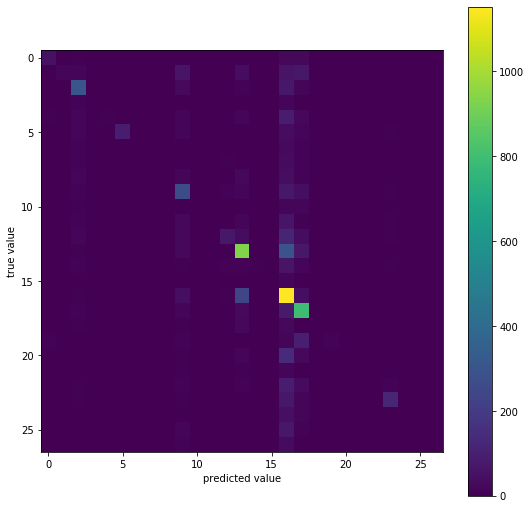

In [15]:
%matplotlib inline

#Fit a Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()  #set up the class
nb.fit(X_train,y_train) #perform the fit

pred_nb = nb.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print ("classification accuracy:", metrics.accuracy_score(pred_nb, y_test))
plot_confusion_matrix(pred_nb, y_test)
print ("Classification Report:")
print (metrics.classification_report(pred_nb,np.array(y_test)))

In [16]:
#Save data for future use.
import pickle
ofname = open('NYT_context_data.pkl', 'wb')
s = pickle.dump([X_train,y_train,X_test,y_test],ofname)
ofname.close()

In [17]:
#What are the top N most predictive features per class?
N = 5
voc = vectorizer.get_feature_names()
for i, label in enumerate(np.unique(y)):
    topN = np.argsort(nb.coef_[i])[-N:]
    print ('Code: '+ str(label) + ' Terms : '+ str([voc[i] for i in topN]))

Code: 1 Terms : ['cut', 'economy', 'market', 'budget', 'tax']
Code: 2 Terms : ['gay', 'race', 'new', 'court', 'abortion']
Code: 3 Terms : ['medicare', 'care', 'drug', 'new', 'health']
Code: 4 Terms : ['disease', 'farm', 'new', 'farmers', 'food']
Code: 5 Terms : ['new', 'workers', 'strike', 'union', 'immigrants']
Code: 6 Terms : ['education', 'students', 'new', 'schools', 'school']
Code: 7 Terms : ['water', 'pollution', 'new', 'global', 'warming']
Code: 8 Terms : ['gas', 'prices', 'energy', 'oil', 'power']
Code: 10 Terms : ['investigation', '800', 'twa', 'flight', 'crash']
Code: 12 Terms : ['death', 'scandal', 'abuse', 'new', 'police']
Code: 13 Terms : ['security', 'clinton', 'social', 'new', 'welfare']
Code: 14 Terms : ['housing', 'york', 'rent', 'nyc', 'new']
Code: 15 Terms : ['new', 'merger', 'scandal', 'antitrust', 'microsoft']
Code: 16 Terms : ['bush', 'challenged', 'war', 'nation', 'iraq']
Code: 17 Terms : ['loss', 'columbia', 'space', 'shuttle', 'new']
Code: 18 Terms : ['deal', '

Comments: Observe that adding the small summary improves the recognition rate by  10% .

As a side note, Naive Bayes with these models creates a linear decision boundary. For this reason, sometimes NB is called a linear classifier

### 5.2 Support Vector Machine (SVM) 

In [3]:
#Recover NTY data
import pickle
fname = open('NYT_context_data.pkl','rb')
data = pickle.load(fname)
X_train = data[0]
y_train = data[1]
X_test = data[2]
y_test = data[3]
print ('Loading ok.')

Loading ok.


classification accuracy: 0.6136912751677852
Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.49      0.56       154
           2       0.47      0.60      0.53       219
           3       0.70      0.67      0.69       459
           4       0.33      0.53      0.41        19
           5       0.62      0.58      0.60       195
           6       0.78      0.71      0.74       216
           7       0.66      0.47      0.55        79
           8       0.65      0.60      0.63        78
          10       0.59      0.57      0.58       129
          12       0.52      0.45      0.48       507
          13       0.47      0.61      0.53        33
          14       0.32      0.50      0.39        92
          15       0.36      0.42      0.38       280
          16       0.68      0.65      0.67      1388
          17       0.49      0.50      0.50       137
          18       0.44      0.42      0.43        26
          19  

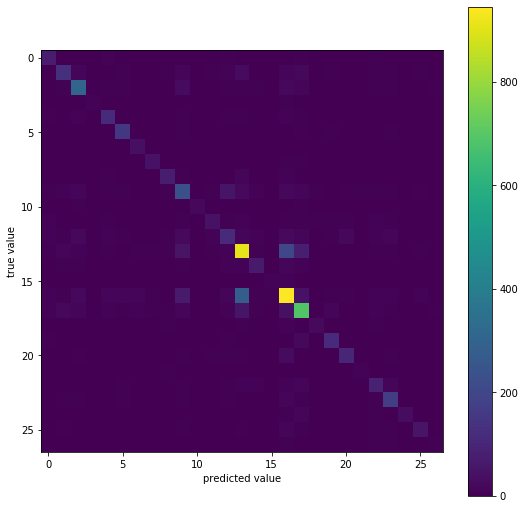

In [6]:
#fit the support vector machine
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X_train,y_train)

#visualize the results
pred_svm = clf.predict(X_test)
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print ("classification accuracy:", metrics.accuracy_score(pred_svm, y_test))
plot_confusion_matrix(pred_svm, y_test)
print ("Classification Report:")
print (metrics.classification_report(pred_svm,np.array(y_test)))

Comments: It is not possible to check the most important words. Maybe we can perform a cross-validation grid search to check the most important words.

In [4]:
#Check a cross-validation grid search
from sklearn import svm
from sklearn import model_selection
parameters = {'C':[0.01, 0.05, 0.1, 0.5, 1, 10]}
svc= svm.LinearSVC()
clf = model_selection.GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

The best parameterization is {'C': 0.05}
The achieved score is 0.6530274762550882
Checking the rest of the scores 

[0.62309193 0.65302748 0.65145862 0.62962178 0.61736771 0.58459125]


[Text(0, 0, '0.01'),
 Text(0, 0, '0.05'),
 Text(0, 0, '0.1'),
 Text(0, 0, '0.5'),
 Text(0, 0, '1'),
 Text(0, 0, '10')]

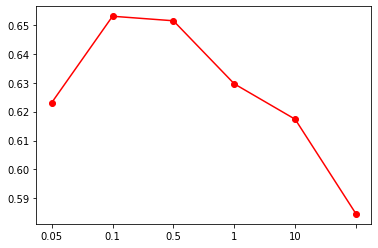

In [7]:
print ('The best parameterization is ' + str(clf.best_params_))
print ('The achieved score is ' + str(clf.best_score_))

print ('Checking the rest of the scores \n')
import matplotlib.pyplot as plt
print(clf.cv_results_['mean_test_score'])

plt.plot(clf.cv_results_['mean_test_score'],'r',marker='o')
ax = plt.gca()
ax.set_xticklabels([0.01, 0.05, 0.1, 0.5, 1, 10])    

classification accuracy: 0.6595973154362416
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.56      0.62       144
           2       0.46      0.68      0.55       189
           3       0.77      0.72      0.74       473
           4       0.37      0.79      0.50        14
           5       0.65      0.70      0.67       171
           6       0.84      0.76      0.80       220
           7       0.73      0.55      0.63        74
           8       0.75      0.69      0.72        78
          10       0.57      0.57      0.57       125
          12       0.57      0.48      0.52       518
          13       0.51      0.71      0.59        31
          14       0.37      0.68      0.48        79
          15       0.40      0.53      0.46       253
          16       0.74      0.68      0.71      1454
          17       0.57      0.61      0.59       131
          18       0.32      0.50      0.39        16
          19  

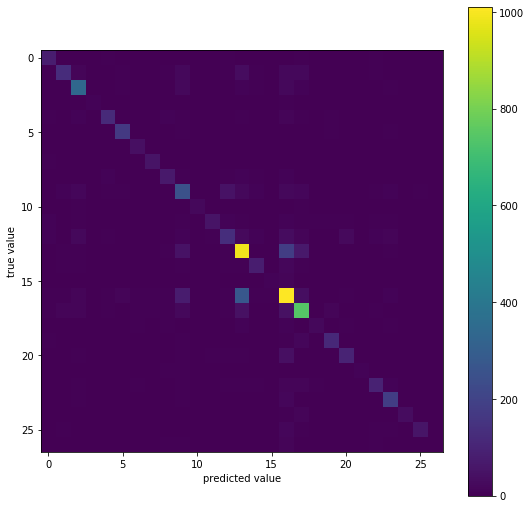

In [9]:
pred_svm = clf.predict(X_test)
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print ("classification accuracy:", metrics.accuracy_score(pred_svm, y_test))
plot_confusion_matrix(pred_svm, y_test)
print ("Classification Report:")
print (metrics.classification_report(pred_svm,np.array(y_test)))

Comments: We can see that the score has improved after aplying the cross validation.